In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.classifier_utils
importlib.reload(mysklearn.classifier_utils)
import mysklearn.classifier_utils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.classifiers
importlib.reload(mysklearn.classifiers)
from mysklearn.classifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.evaluators
importlib.reload(mysklearn.evaluators)
import mysklearn.evaluators as myevaluation
import matplotlib as plt

## Intro to attributes

In our dataset we have the following attributes:

1. Radiaologist_Assesment
    - Radiologist's assessment based on the BI-RADS scale
1. Age_At_The_Time_Of_Mammography
    - Patients Age
1. IsBinaryIndicatorOfCancer_Diagnosis	
    - Binary indicator of cancer diagnosis within one year of screening mammogram (false= No cancer diagnosis, true= Cancer diagnosis)
1. ComparisonMammogramFrom_Mammography	
    - Comparison mammogram from prior mammography examination available
1. PatientsBIRADSBreastDensity
    - Patient's BI-RADS breast density as recorded at time of mammogram
1. FamilyHistoryOfBreastCancer
    - Family history of breast cancer in a first degree relative
1. Current use of hormone therapy at time of mammogram
    - Current use of hormone therapy at time of mammogram
1. Binary_Indicator
    - Binary indicator of whether the woman had ever received a prior mammogram
1. HistoryOfBreast_Biopsy	
    - Prior history of breast biopsy
1. IsFilmOrDigitalMammogram	
    - Film or digital mammogram (true=Digital mammogram, false=Film mammogram)


## Data Preparation
We start by cleaning the data. Upon manually looking at the data, we decided to remove the attributes: 
- Cancer_Type
- BMI
- Patient Study ID

This was done due to irrelavence, and a great amount of missing data within these attributes.


## Loading The Data

We will be loading the data into our MyPyTable and do the preliminary cleaning

In [124]:
data = MyPyTable()
data.load_from_file("input_data/breastcancer.csv")
data.rem_column("Cancer_Type")
data.rem_column("Body_Mass_Index")
data.rem_column("Patients_Study_ID")
data.save_to_file("input_data/breast_cancer_clean.csv")
y = data.get_column("Radiologists_Assessment")
y = myutils.y_clean(y)
data.rem_column("Radiologists_Assessment")
X = data.data

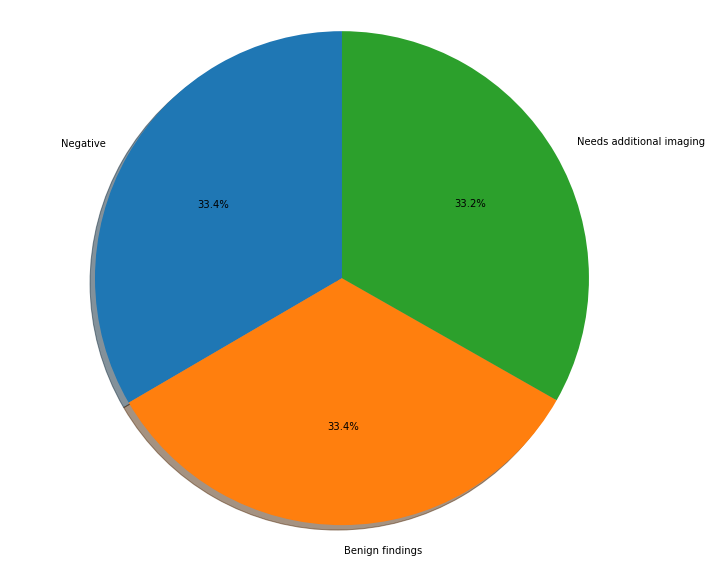

fig 1 Distributions


In [125]:


labels, sizes = myutils.return_counts(y)
myutils.piecharty(labels, sizes)
print("fig 1 Distributions")



# Bar Charts

Below Are BarCharts of our Data

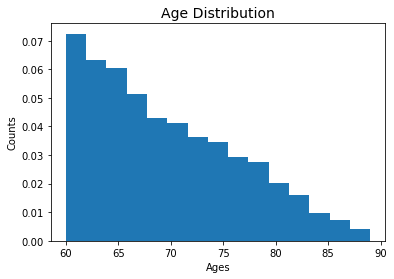

fig 2.1 Age Distribution


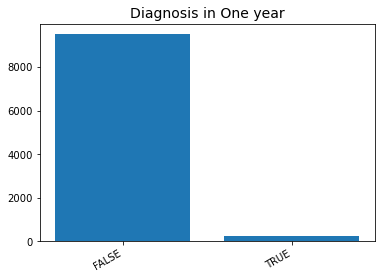

fig 2.2 Diagnosis Results One Year Later


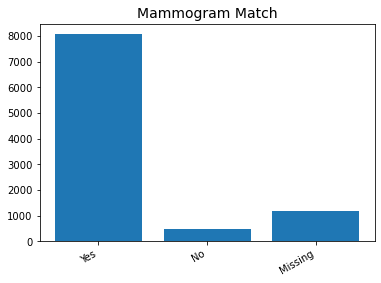

fig 2.3 Mammogram Matches Previous Mammograms


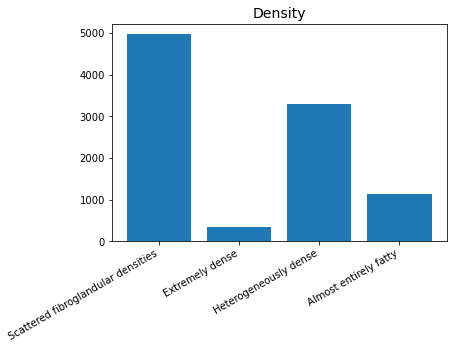

fig 2.4 Density Distributions of Mammograms


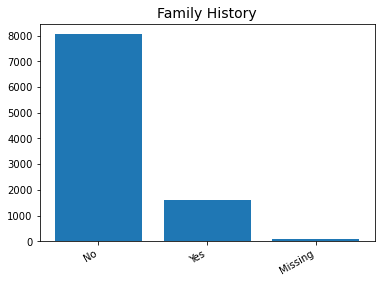

fig 2.5 Distribution of Family History of Cancer


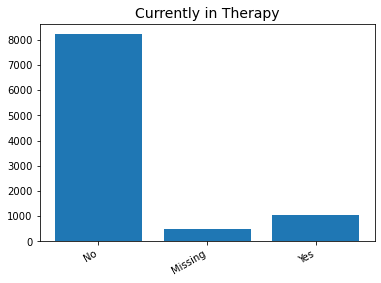

fig 2.6 Distribution of Patients Currently in Theraphy


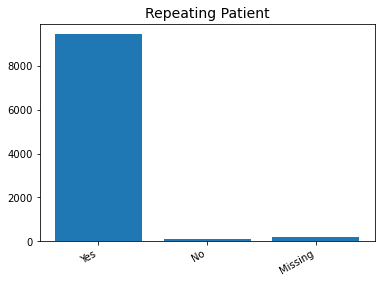

fig 2.7 Distribution of Patients who had prior Mammograms


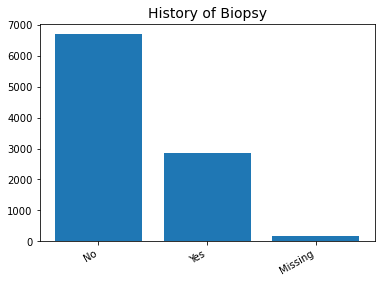

fig 2.8 Distribution of History of Biopsy


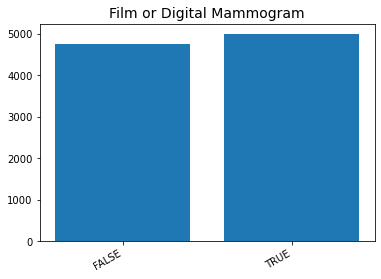

fig 2.9 Distribution of Physical or Digital Mammograms


In [126]:
ages = data.get_column("Age_At_The_Time_Of_Mammography")
myutils.histogramy(ages, "Age Distribution", "Ages")
print("fig 2.1 Age Distribution")

binary_indicator = data.get_column("Is_Binary_Indicator_Of_Cancer_Diagnosis")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Diagnosis in One year")
print("fig 2.2 Diagnosis Results One Year Later")

binary_indicator = data.get_column("Comparison_Mammogram_From_Mammography")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Mammogram Match")
print("fig 2.3 Mammogram Matches Previous Mammograms")

binary_indicator = data.get_column("Patients_BI_RADS_Breast_Density")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Density")
print("fig 2.4 Density Distributions of Mammograms")

binary_indicator = data.get_column("Family_History_Of_Breast_Cancer")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Family History")
print("fig 2.5 Distribution of Family History of Cancer")

binary_indicator = data.get_column("Current_Use_Of_Hormone_Therapy")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Currently in Therapy")
print("fig 2.6 Distribution of Patients Currently in Theraphy")

binary_indicator = data.get_column("Binary_Indicator")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Repeating Patient")
print("fig 2.7 Distribution of Patients who had prior Mammograms")

binary_indicator = data.get_column("History_Of_Breast_Biopsy")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"History of Biopsy")
print("fig 2.8 Distribution of History of Biopsy")

binary_indicator = data.get_column("Is_Film_Or_Digital_Mammogram")
labels, sizes = myutils.return_counts(binary_indicator)
myutils.barcharty(labels,sizes,"Film or Digital Mammogram")
print("fig 2.9 Distribution of Physical or Digital Mammograms")




# Fitting the Data to Our Classifiers

now that we have the data loaded and cleaned, let us fit it into our Naive Baynes and Knn classifier.

In [127]:
nvb_clf = MyNaiveBayesClassifier()
knn_clf = MyKNeighborsClassifier(3)

split = myevaluation.stratified_kfold_split(X[:1000], y[:1000], 10, 10, True)

In [128]:
X_train = []
y_train = []
X_test = []
y_test = []
for train, test in split:
    for i in train:
        X_train.append(X[i])
        y_train.append(y[i])
    for i in test:
        X_test.append(X[i])
        y_test.append(y[i])

nvb_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test, True)
nvb_pred = nvb_clf.predict(X_test)


## Predictions
Now that our classifiers are ready, we will be seeing how accurate their predictions were

In [129]:
knn_acc = myevaluation.accuracy_score(y_test, knn_pred)
nvb_acc = myevaluation.accuracy_score(y_test, nvb_pred)
print("===========================================")
print("STEP 1: Predictive Accuracy")
print("===========================================")
print("Stratified 10-Fold Cross Validation")
print("k Nearest Neighbors Classifier: accuracy = {}, error rate = {}".format(round(knn_acc, 2), round(1-knn_acc, 2)))
print("Naive Bayes Classifier: accuracy = {}, error rate = {}".format(round(nvb_acc, 2), round(1-nvb_acc, 2)))

STEP 1: Predictive Accuracy
Stratified 10-Fold Cross Validation
k Nearest Neighbors Classifier: accuracy = 0.8, error rate = 0.2
Naive Bayes Classifier: accuracy = 0.53, error rate = 0.47


In [130]:
knn_pre = myevaluation.binary_precision_score(y_test, knn_pred, pos_label="Negative")
nvb_pre = myevaluation.binary_precision_score(y_test, nvb_pred, pos_label="Negative")
knn_rec = myevaluation.binary_recall_score(y_test, knn_pred, pos_label="Negative")
nvb_rec = myevaluation.binary_recall_score(y_test, nvb_pred, pos_label="Negative")
knn_f1 = myevaluation.binary_f1_score(y_test, knn_pred, pos_label="Negative")
nvb_f1 = myevaluation.binary_f1_score(y_test, nvb_pred, pos_label="Negative")
print("===========================================")
print("STEP 2: Predictive Accuracy")
print("===========================================")
print("Stratified 10-Fold Cross Validation")
print("k Nearest Neighbors Classifier: precision = {}, recall = {}, f1 = {}".format(round(knn_pre, 2), round(knn_rec, 2), round(knn_f1, 2)))
print("Naive Bayes Classifier: precision = {}, recall = {}, f1 = {}".format(round(nvb_pre, 2), round(nvb_rec, 2), round(nvb_f1, 2)))

STEP 2: Predictive Accuracy
Stratified 10-Fold Cross Validation
k Nearest Neighbors Classifier: precision = 0.75, recall = 0.94, f1 = 0.83
Naive Bayes Classifier: precision = 0.52, recall = 0.95, f1 = 0.67


In [131]:
from tabulate import tabulate 

knn_matrix = myevaluation.confusion_matrix(y_test, knn_pred, ["Negative", "Benign findings", "Probably benign", "Needs additional imaging", "Suspicious abnormality"])
nvb_matrix = myevaluation.confusion_matrix(y_test, nvb_pred, ["Negative", "Benign findings", "Probably benign", "Needs additional imaging", "Suspicious abnormality"])

print("===========================================")
print("STEP 4: Confusion Matrices")
print("===========================================")
print("k Nearest Neighbors Classifier (Stratified 10-Fold Cross Validation Results):")

print(tabulate(knn_matrix, headers=["Negative", "Benign findings", "Probably benign", "Needs additional imaging", "Suspicious abnormality"]))

print("Naive Bayes Classifier (Stratified 10-Fold Cross Validation Results):")

print(tabulate(nvb_matrix, headers=["Negative", "Benign findings", "Probably benign", "Needs additional imaging", "Suspicious abnormality"]))

STEP 4: Confusion Matrices
k Nearest Neighbors Classifier (Stratified 10-Fold Cross Validation Results):
  Negative    Benign findings    Probably benign    Needs additional imaging    Suspicious abnormality
----------  -----------------  -----------------  --------------------------  ------------------------
       309                 19                  0                           2                         0
        78                188                  0                           2                         0
         0                  0                  0                           0                         0
        26                  7                  0                          41                         0
         0                  0                  0                           0                         0
Naive Bayes Classifier (Stratified 10-Fold Cross Validation Results):
  Negative    Benign findings    Probably benign    Needs additional imaging    Suspicious abnormality
-

## Summary

It seems that Knn was a better classifier in our preliminary testing than Naive Bayes, with higher predictive accuracy and metrics